In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# pd.read_csv('data/example.csv')
# pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/...')

In [34]:
import yfinance as yf
rets = yf.download(tickers='SPY', interval='1mo')["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [35]:
type(rets) # 1 dimensional pd.Series for single stock

pandas.core.series.Series

In [36]:
rets

Date
1993-02-01     25.296396
1993-03-01     25.741449
1993-04-01     25.201242
1993-05-01     25.880919
1993-06-01     25.791470
                 ...    
2023-04-01    414.390686
2023-05-01    416.303619
2023-06-01    441.639496
2023-07-01    457.790009
2023-08-01    439.640015
Name: Adj Close, Length: 367, dtype: float64

In [37]:
rets = yf.download(tickers=['SPY', 'BND'], interval='1mo')["Adj Close"]

[*********************100%***********************]  2 of 2 completed


In [38]:
type(rets) # 2 dimensional pd.DataFrame for multiple stocks

pandas.core.frame.DataFrame

In [39]:
rets

,BND,SPY
Date,,
1993-02-01,NaN,25.296406
1993-03-01,NaN,25.741446
1993-04-01,NaN,25.201241
1993-05-01,NaN,25.880901
1993-06-01,NaN,25.791473
...,...,...
2023-04-01,73.146523,414.390686
2023-05-01,72.298820,416.303619
2023-06-01,72.127640,441.639496


In [40]:
rets.dropna(inplace=True)
rets

,BND,SPY
Date,,
2007-05-01,45.529774,111.742195
2007-06-01,45.307594,109.635872
2007-07-01,45.739956,106.660881
2007-08-01,46.375027,108.029633
2007-09-01,46.663116,111.682121
...,...,...
2023-04-01,73.146523,414.390686
2023-05-01,72.298820,416.303619
2023-06-01,72.127640,441.639496


In [41]:
rets = rets.to_period('M')
rets # Price Series

,BND,SPY
Date,,
2007-05,45.529774,111.742195
2007-06,45.307594,109.635872
2007-07,45.739956,106.660881
2007-08,46.375027,108.029633
2007-09,46.663116,111.682121
...,...,...
2023-04,73.146523,414.390686
2023-05,72.298820,416.303619
2023-06,72.127640,441.639496


<Axes: xlabel='Date'>

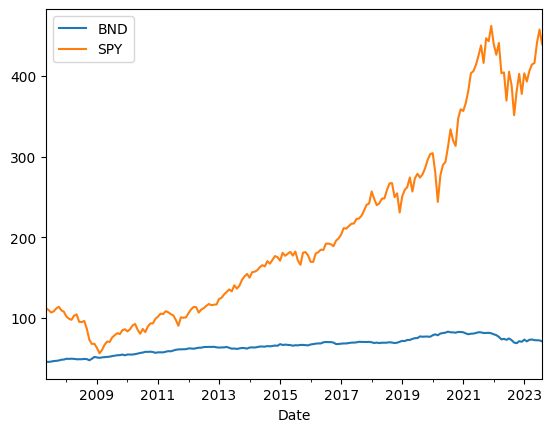

In [42]:
rets.plot()

### Single Period Returns

Return from time period $i$ (initial) to $f$ (final):

$$ R_{i, f} = \frac{P_{f}-P_{i}}{P_{i}} $$

Buy at 10, sell at 13

$$ R_{10, 13} = \frac{P_{13}-P_{10}}{P_{10}} = \frac{3}{10} = 0.3 = 30\% $$

Identical to:

$$ R_{i, f} = \frac{P_{f}}{P_{i}} - 1 $$

$$ R_{10, 13} = \frac{13}{10} - 1 = 1.3 - 1 = 0.3 = 30\% $$

Price Return if ( $P_{f}$ = Price ) 

Total Return if ( $P_{f}$ = Price + Cashflows) 

### Multi Period Returns

$$ R_{t_1, t_3} = (1 + R_{t_1, t_2})(1 + R_{t_2, t_3}) - 1$$

DAY 1: 30% gain

DAY 2: 30% loss

$$ R_{t_1, t_3} = (1 + 0.3)(1 + -0.3) - 1 = (1.3)(0.7) - 1  = 0.91 - 1 = -.09  = -9\%$$

Compound (geometric) returns are NOT additive

Geometric return = -9%

Arithmetic return = 30 + (-30) = 0%

In [43]:
# Returns cannot be computed for the first day, as previous closing prices are not available
# Whenever we convert from prices to returns, we lose a single data point

In [44]:
# Convert prices to returns
rets = rets.pct_change().dropna() # Return Series

<Axes: xlabel='Date'>

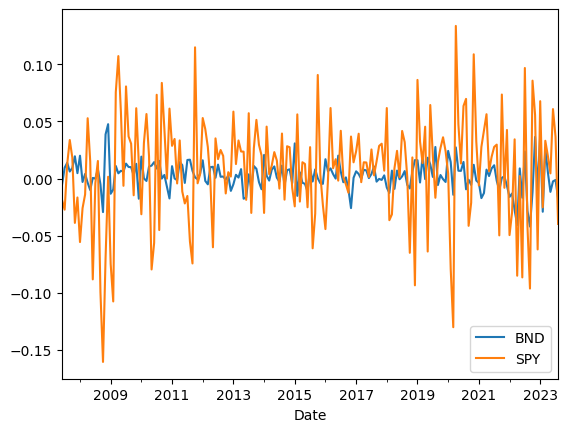

In [45]:
rets.plot()

In [46]:
compound_returns = (rets + 1).prod() - 1
(compound_returns * 100).round(2).astype('str') + '%'

BND     55.48%
SPY    293.44%
dtype: object

In [47]:
rets.head()
rets.tail()
rets.size
rets.shape

(195, 2)

In [48]:
rets.index
rets.columns
rets['SPY']
rets[['SPY']]

,SPY
Date,
2007-06,-0.018850
2007-07,-0.027135
2007-08,0.012833
2007-09,0.033810
2007-10,0.018375
...,...
2023-04,0.019852
2023-05,0.004616
2023-06,0.060859


In [49]:
rets.loc['2009-02']
rets.iloc[20]

BND   -0.009570
SPY   -0.107449
Name: 2009-02, dtype: float64

In [50]:
rets.loc['2009-02': '2009-05']
rets.iloc[20:24]

,BND,SPY
Date,,
2009-02,-0.009570,-0.107449
2009-03,0.011091,0.075612
2009-04,0.004645,0.107215
2009-05,0.006865,0.058453


### Measures of Risk

Variance
$$ \sigma^2 = \frac{1}{N} {\sum_{i=1}^{N}(R_i - \mu)^2} $$

Standard Deviation - Square Root of Variance

In [51]:
rets.std() # Standard Deviation

BND    0.012968
SPY    0.046779
dtype: float64

Annualizing Returns

If you have a return of 1% / month, what is the annualized return?

$$ R_{annualized} = ( (1 + 0.01) (1 + 0.01) (1 + 0.01) ... (1 + 0.01) ) - 1 $$

$$ R_{annualized} = (1 + 0.01)^{12} - 1 $$

In [52]:
n_periods = rets.shape[0]
compounded_growth = (1+rets).prod()
monthly_ret = compounded_growth**(1/n_periods) - 1
(monthly_ret + 1)**12 - 1

BND    0.027532
SPY    0.087948
dtype: float64

In [53]:
def annualize_rets(r, periods_per_year=12):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year / n_periods) - 1

In [54]:
annualize_rets(rets)

BND    0.027532
SPY    0.087948
dtype: float64

Annualized Standard Deviation
$$ \sigma * \sqrt{p}$$

In [55]:
def annualize_vol(r, periods_per_year=12):
    return r.std() * (periods_per_year**0.5)

In [56]:
annualize_vol(rets)

BND    0.044924
SPY    0.162049
dtype: float64

Sharpe Ratio

In [57]:
# Raw Sharpe Ratio
annualize_rets(rets) / annualize_vol(rets)

BND    0.612862
SPY    0.542724
dtype: float64

<Axes: xlabel='Date'>

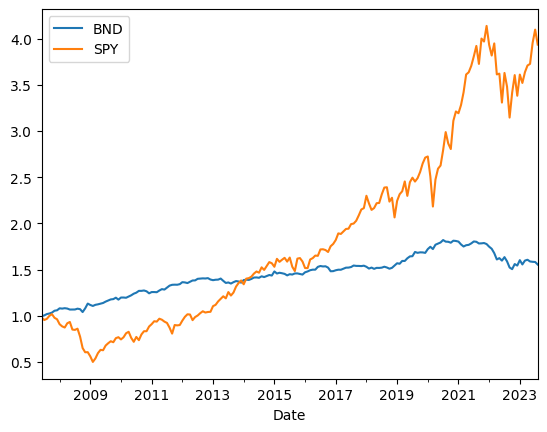

In [58]:
# Growth of 1 dollar
wealth_index = (1+rets).cumprod()
wealth_index.plot()

In [59]:
rets = yf.download(tickers='SPY', interval='1mo')["Adj Close"].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


Text(2011-02-01 00:00:00, -0.6094175942724721, 'Max Drawdown: -50.78%')

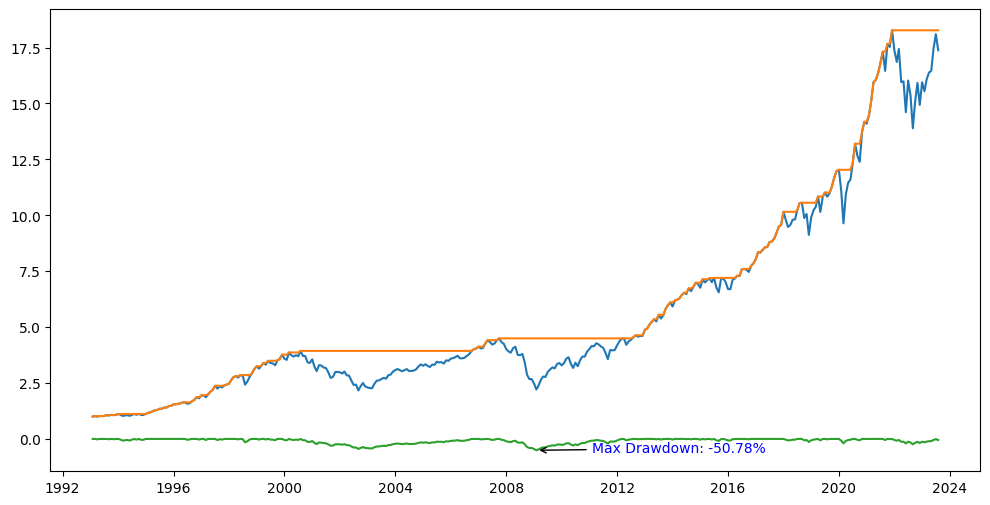

In [60]:
wealth_index = (1+rets).cumprod()
start_date = wealth_index.index.min() - pd.DateOffset(months=1)
wealth_index = pd.concat([pd.Series([1], index=[start_date]), wealth_index])

previous_peaks = wealth_index.cummax()
drawdowns = (wealth_index - previous_peaks)/previous_peaks

plt.figure(figsize=(12, 6))
max_drawdown = drawdowns.min()
max_drawdown_date = drawdowns.idxmin()

plt.plot(wealth_index)
plt.plot(previous_peaks)
plt.plot(drawdowns)

plt.annotate(f'Max Drawdown: {max_drawdown:.2%}', xy=(max_drawdown_date, max_drawdown),
            xytext=(max_drawdown_date + pd.DateOffset(years=2), max_drawdown * 1.2),
            arrowprops=dict(arrowstyle='->', lw=1), color='blue')